In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
house_data = pd.read_csv('house_data_ultimate_cleaned', sep=',', index_col='Unnamed: 0')
df = house_data.copy()

In [4]:
df.head()

,Area,Price,State_of_building,Facades,Bedrooms,Kitchen,Furnished,Open_fire,Zip_code,Land_surface,Terrace,Terrace_surface,Swimming_pool,Subtype_property,Garden,Garden_surface,Regions,Price_per_square_meter
0,123.0,200000,Good,3.0,2.0,Installed,No,No,3294,429.0,No,0,No,house,Yes,350,Flanders,1626.02
1,255.0,698000,Just renovated,4.0,4.0,Installed,No,No,2070,1210.0,No,0,No,villa,No,0,Flanders,2737.25
2,234.0,499000,As new,NaN,5.0,NaN,No,No,8800,744.0,No,0,No,villa,No,0,Flanders,2132.48
3,219.0,717000,As new,NaN,4.0,NaN,No,No,8000,760.0,No,0,No,house,No,0,Flanders,3273.97
4,156.0,429000,Good,4.0,4.0,Installed,No,No,8800,419.0,No,0,No,villa,Yes,90,Flanders,2750.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7801 entries, 0 to 8332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    7801 non-null   float64
 1   Price                   7801 non-null   int64  
 2   State_of_building       5889 non-null   object 
 3   Facades                 6256 non-null   float64
 4   Bedrooms                7746 non-null   float64
 5   Kitchen                 5601 non-null   object 
 6   Furnished               7801 non-null   object 
 7   Open_fire               7801 non-null   object 
 8   Zip_code                7801 non-null   int64  
 9   Land_surface            7801 non-null   float64
 10  Terrace                 7801 non-null   object 
 11  Terrace_surface         7801 non-null   int64  
 12  Swimming_pool           7801 non-null   object 
 13  Subtype_property        7801 non-null   object 
 14  Garden                  7801 non-null   

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Area'),
  Text(1, 0, 'Price'),
  Text(2, 0, 'Facades'),
  Text(3, 0, 'Bedrooms'),
  Text(4, 0, 'Zip_code'),
  Text(5, 0, 'Land_surface'),
  Text(6, 0, 'Terrace_surface'),
  Text(7, 0, 'Garden_surface'),
  Text(8, 0, 'Price_per_square_meter')])

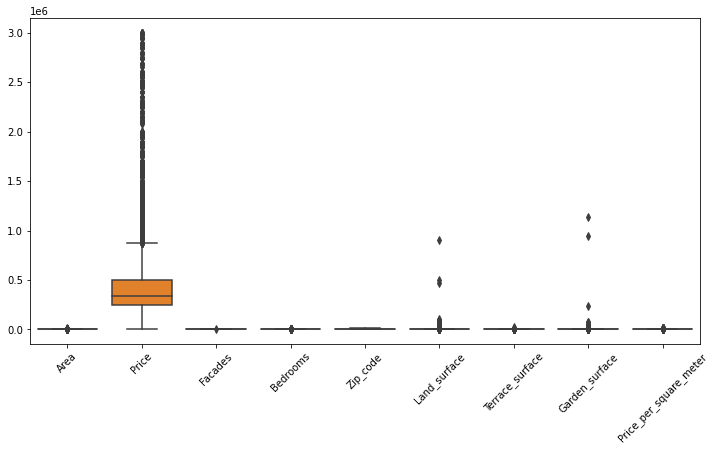

In [6]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Boxplot
sns.boxplot(data=df)
plt.xticks(rotation=45)

<AxesSubplot:>

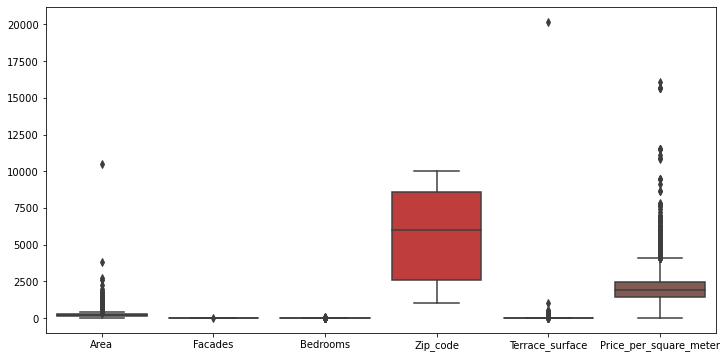

In [7]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

stats_df = df.drop(['Price', 'Land_surface','Garden_surface'], axis=1)
sns.boxplot(data=stats_df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Installed'),
  Text(1, 0, 'Hyper equipped'),
  Text(2, 0, 'Semi equipped'),
  Text(3, 0, 'Not installed')])

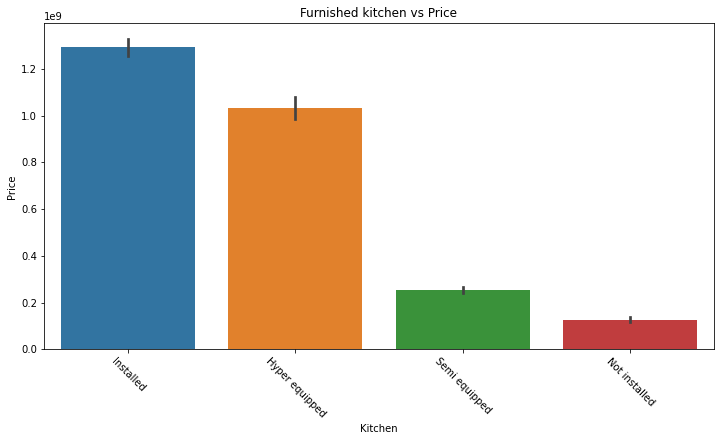

In [8]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Kitchen', y='Price', data=df, estimator=sum)
plt.title('Furnished kitchen vs Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(0.0, 2000000.0)

<Figure size 864x432 with 0 Axes>

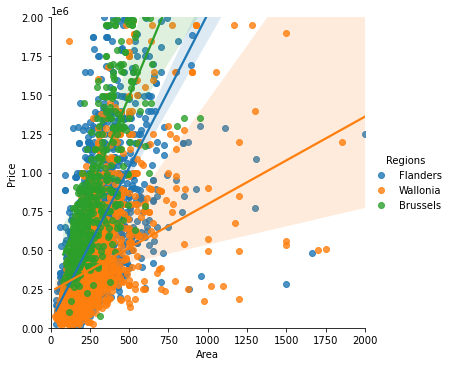

In [10]:
plt.figure(figsize=(12,6))
sns.lmplot(x = 'Area', y='Price', data=df, hue='Regions')
plt.xlim(0, 2000)
plt.ylim(0, 2000000)

(0.0, 2000000.0)

<Figure size 864x432 with 0 Axes>

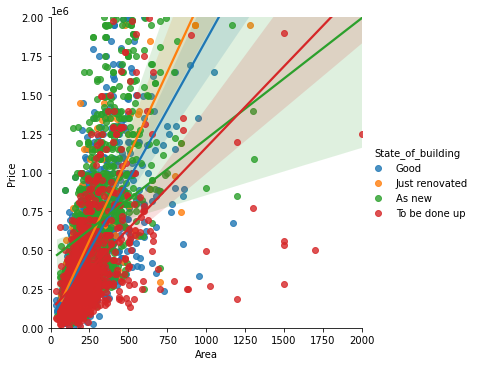

In [11]:
plt.figure(figsize=(12,6))
sns.lmplot(x = 'Area', y='Price', data=df, hue='State_of_building')
plt.xlim(0, 2000)
plt.ylim(0, 2000000)

<AxesSubplot:xlabel='State_of_building', ylabel='Price'>

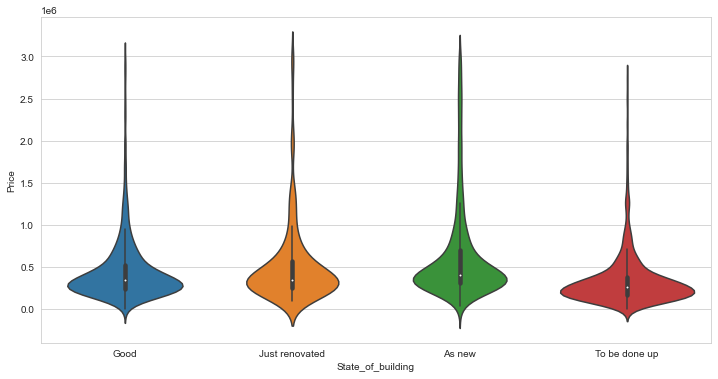

In [12]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

# Set theme
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(x='State_of_building', y='Price', data=df)

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.catplot(x="Area", y="Price", hue="State_of_building", kind="swarm", data=df)

Text(0.5, 1.0, 'Numeric Feature heatmap')

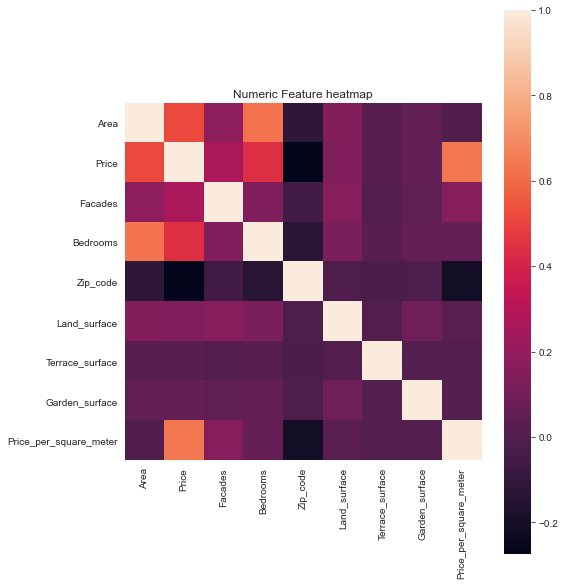

In [14]:
fig,ax = plt.subplots(figsize=(8,10))
correlation = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

Text(0.5, 1.0, 'Numeric Feature heatmap')

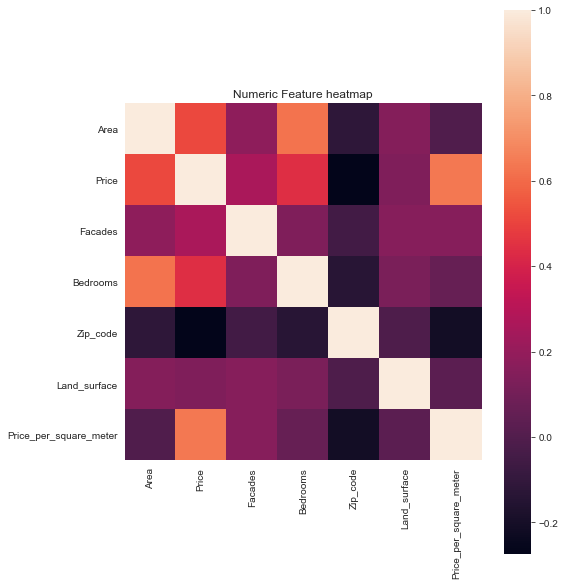

In [16]:
stats_df = df.drop(['Terrace_surface','Garden_surface'], axis=1)

fig,ax = plt.subplots(figsize=(8,10))
correlation = stats_df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

Text(0.5, 1.0, 'Numeric Feature heatmap')

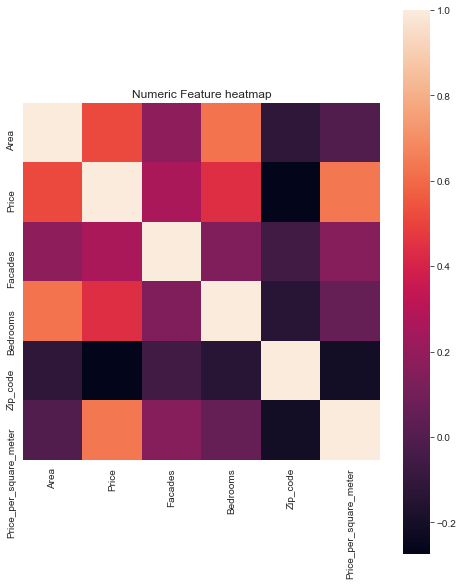

In [17]:
stats_df = df.drop(['Terrace_surface', 'Land_surface','Garden_surface'], axis=1)

fig,ax = plt.subplots(figsize=(8,10))
correlation = stats_df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(correlation,ax=ax,vmax=1,square=True)
plt.title('Numeric Feature heatmap')

In [38]:
# Melt DataFrame
melted_df = pd.melt(df, 
                    id_vars=["Regions", "State_of_building", "Subtype_property", "Kitchen",
                             "Furnished", "Open_fire", "Terrace", "Garden" ], # Variables to keep
                    var_name="State") # Name of melted variable
melted_df.head()

,Regions,State_of_building,Subtype_property,Kitchen,Furnished,Open_fire,Terrace,Garden,State,value
0,Flanders,Good,house,Installed,No,No,No,Yes,Area,123.0
1,Flanders,Just renovated,villa,Installed,No,No,No,No,Area,255.0
2,Flanders,As new,villa,NaN,No,No,No,No,Area,234.0
3,Flanders,As new,house,NaN,No,No,No,No,Area,219.0
4,Flanders,Good,villa,Installed,No,No,No,Yes,Area,156.0


In [39]:
melted_df.tail()

,Regions,State_of_building,Subtype_property,Kitchen,Furnished,Open_fire,Terrace,Garden,State,value
78005,Wallonia,As new,house,Hyper equipped,No,No,Yes,Yes,Price_per_square_meter,1964.57
78006,Wallonia,Good,house,Installed,No,No,No,Yes,Price_per_square_meter,1992.31
78007,Wallonia,Good,house,Semi equipped,No,No,No,Yes,Price_per_square_meter,555.56
78008,Wallonia,As new,house,NaN,No,No,No,Yes,Price_per_square_meter,1544.29
78009,Flanders,As new,house,NaN,No,No,No,No,Price_per_square_meter,2900.0


In [40]:
melted_df.shape

(78010, 10)

In [ ]:
ax=sns.swarmplot(x='State', y='value', data=melted_df, hue='Regions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'house'),
  Text(1, 0, 'villa'),
  Text(2, 0, 'mixed'),
  Text(3, 0, 'town'),
  Text(4, 0, 'chalet'),
  Text(5, 0, 'country'),
  Text(6, 0, 'apartment'),
  Text(7, 0, 'mansion'),
  Text(8, 0, 'exceptiona'),
  Text(9, 0, 'bungalow'),
  Text(10, 0, 'manor'),
  Text(11, 0, 'farmhouse'),
  Text(12, 0, 'castle'),
  Text(13, 0, 'other')])

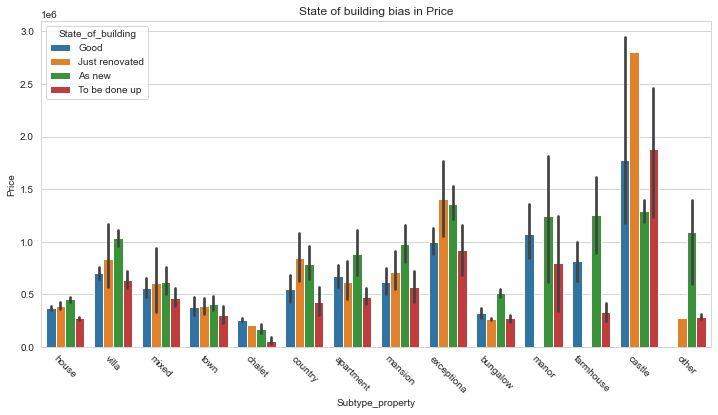

In [34]:
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='State_of_building')
plt.title('State of building bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Flanders'), Text(1, 0, 'Wallonia'), Text(2, 0, 'Brussels')])

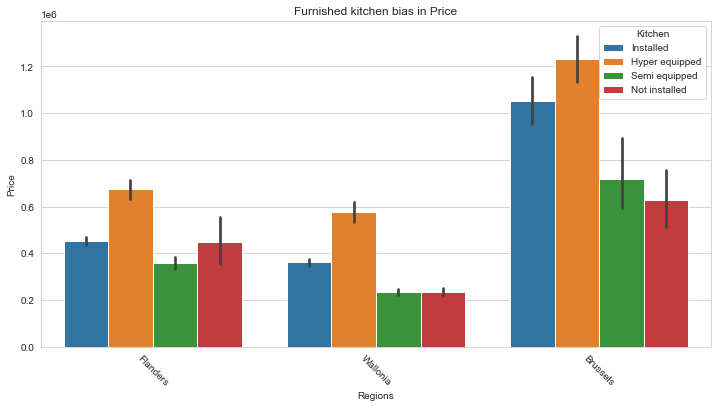

In [31]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Regions', y='Price', data=df, hue='Kitchen')
plt.title('Furnished kitchen bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

In [36]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Kitchen')
plt.title('Kitchen bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

In [ ]:
# Set figure size with matplotlib
plt.figure(figsize=(12,6))

sns.barplot(x='Subtype_property', y='Price', data=df, hue='Kitchen')
plt.title('Kitchen bias in Price')

# Rotate x-labels
plt.xticks(rotation=-45)

In [ ]:
d = sns.displot(data=df, x="Price", hue="Kitchen", multiple="stack")
plt.title('Sale price vs Kitchen')
plt.xlabel('Sale price (in millions)')
plt.ylabel('Freqency')
plt.xlim(0, 2000000)